# CDS ML Assignment 7
##### Group 37 - Rahul Deivasigamani (S1157698) - Joshua John Gigi (S1140063) - Anestis Pantazis (S1169388)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

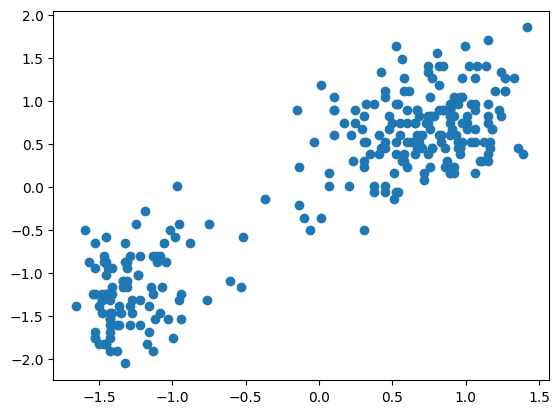

In [5]:
points_oldfaith = np.loadtxt("datasets/oldFaith.txt")
points_oldfaith = (points_oldfaith - points_oldfaith.mean(0)[None]) / points_oldfaith.std(0)[None]
plt.scatter(points_oldfaith[:,0], points_oldfaith[:,1]);

## Ex 7.1

Write your own K-means algorithm and compare your results with the ones on the Old Faithful dataset in section **K-means: do it yourself**.

### K-means: do it yourself

```
initialize K centroid vectors (cluster centers) m_k

for iter from 1 to max_iter or until convergence:

    for mu from 1 to N:
        # Assign each data point to its closest cluster center
        k_mu ← arg min || x_mu − m_k ||

    for k from 1 to K:
        # Update each cluster center m_k by computing the mean of all points assigned to it
```

In [6]:
points_oldfaith_np = np.array(points_oldfaith)

def plot_points(K, k_assignments, m_k):
    plt.figure(figsize=(8, 6))
    for k in range(K):
        cluster_points = points_oldfaith[k_assignments == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    alpha=0.6, s=50, label=f'Cluster {k+1}')
    
    # Plot centroids
    plt.scatter(m_k[:, 0], m_k[:, 1], c='red', marker='.', 
                s=200, edgecolors='black', linewidths=2, label='Centroids')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'K-Means K={K}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
def plot_cluster_evolution(points, m_k_history, k_assignments_history):
    n_iters = len(k_assignments_history)
    _,K = points.shape
    
    # Determine grid size for subplots
    n_cols = min(4, n_iters)
    n_rows = (n_iters + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    if n_iters == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    colors = plt.cm.rainbow(np.linspace(0, 1, K))
    
    for idx, (assignments, m_k) in enumerate(zip(k_assignments_history, m_k_history[:-1])):
        ax = axes[idx]
        
        # Plot points colored by cluster assignment
        for k in range(K):
            cluster_points = points[assignments == k]
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                      c=[colors[k]], alpha=0.6, s=30, label=f'Cluster {k}')
        
        # Plot cluster centers
        ax.scatter(m_k[:, 0], m_k[:, 1], 
                  c='black', marker='.', s=200, edgecolors='white', linewidths=2,
                  label='Centers', zorder=5)
        
        ax.set_title(f'Iteration {idx+1}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        if idx == 0:
            ax.legend()
    
    # Hide unused subplots
    for idx in range(n_iters, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


def kmeans(points_oldfaith, K=2, max_iter = 100):
    N,_ = points_oldfaith.shape
    m_k = points_oldfaith[np.random.choice(N,K, replace=False)].copy()
    m_k_history = [m_k.copy()]
    k_assignments_history = []
    for iter in range(max_iter):
        k_assignments = np.zeros(N)
        
        for mu in range(N):
            distances = np.linalg.norm(points_oldfaith[mu] - m_k, axis=1)
            k_assignments[mu] = np.argmin(distances)
        
        k_assignments_history.append(k_assignments.copy())
        old_m_k = m_k.copy()
        
        for k in range(K):
            # Update each cluster center m_k by computing the mean of all points assigned to it
            points_in_cluster = points_oldfaith[k_assignments == k]
            if len(points_in_cluster) > 0:
                m_k[k] = points_in_cluster.mean(axis=0)
        m_k_history.append(m_k.copy())
        
        if np.allclose(m_k, old_m_k):
            print(f"Converged at iteration {iter}")
            plot_points(K,k_assignments, m_k)
            plot_cluster_evolution(points_oldfaith_np, m_k_history, k_assignments_history)
            break
    return m_k, m_k_history, k_assignments_history

Converged at iteration 6


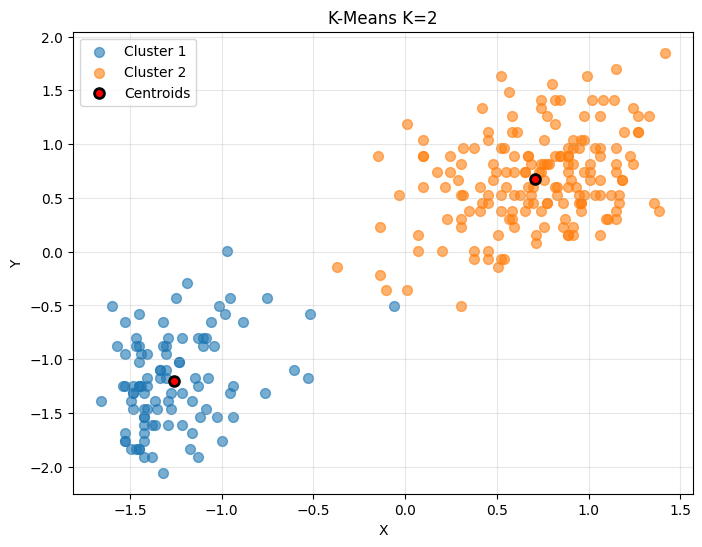

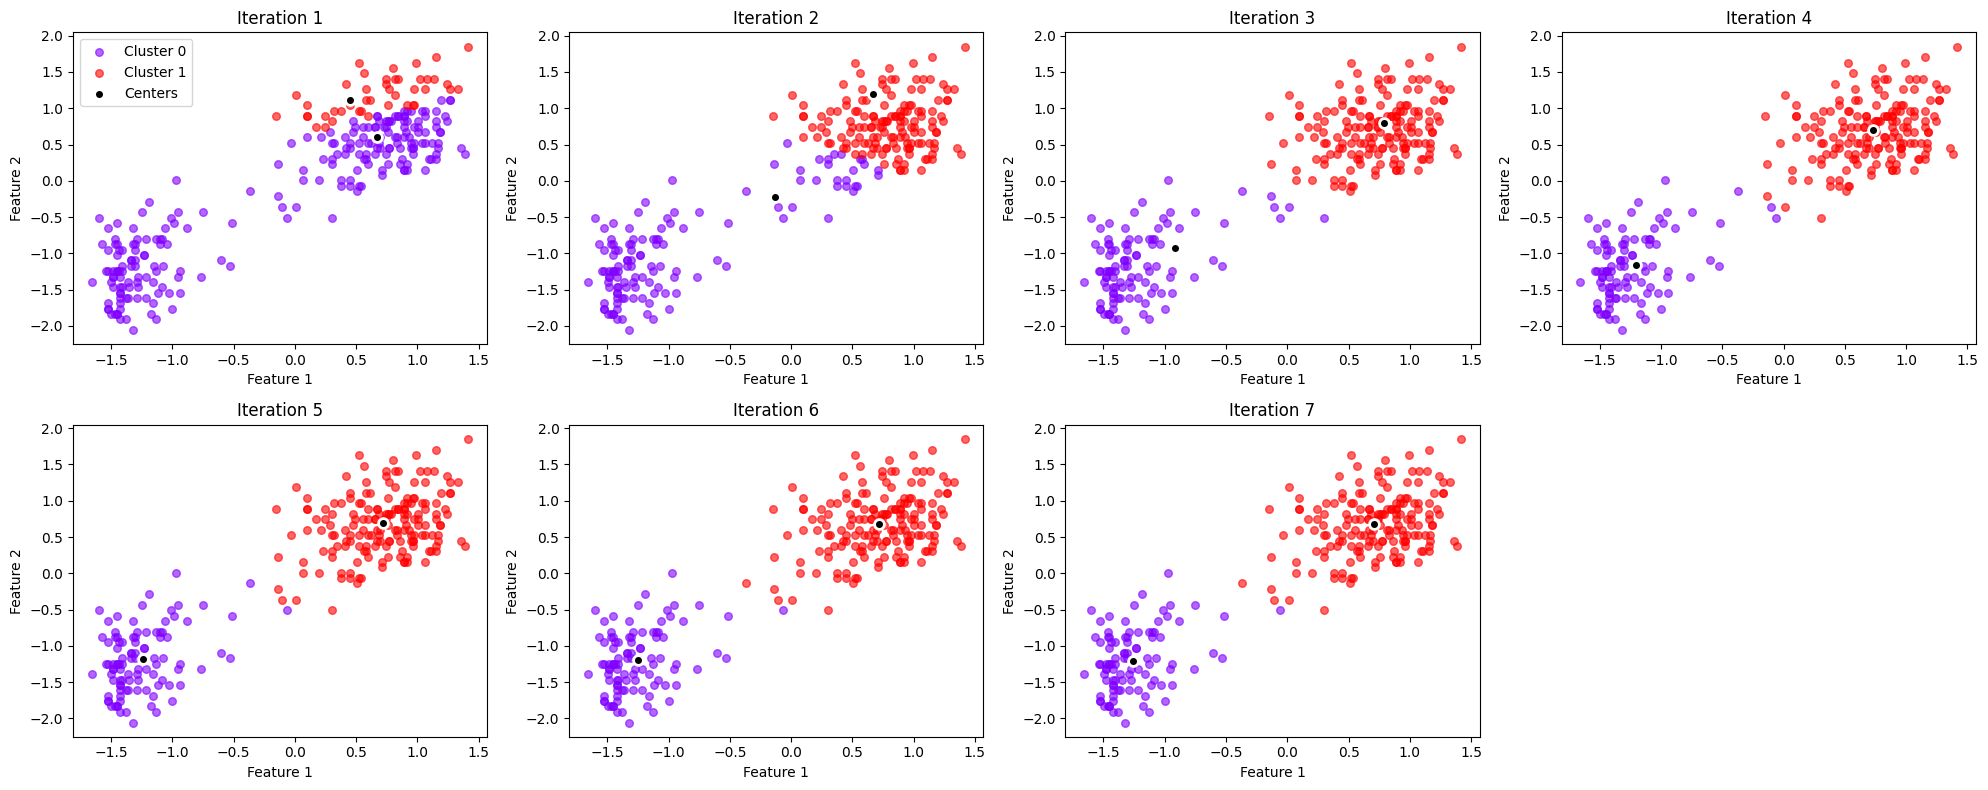

In [7]:
m_k, m_k_history, k_assignments_history = kmeans(points_oldfaith=points_oldfaith_np, K=2, max_iter=100)

## Ex 7.2

Write a clustering algorithm based on the multinomial mixture model and apply it to the MNIST data. Compare your results with the ones showed in section **Mixture of Bernoullis on MNIST**.

## Ex 7.3

Consider the one dimensional Gaussian mixture model
$$
p(x,k)=\pi_k \frac{1}{\sqrt{2\pi \sigma_k^2} }\exp\left(-\frac{(x-a_k)^2}{2\sigma_k^2}\right)
$$
with observable data $x^\mu, \mu =1, \dots, N$ and discrete latent variable $k=1,\dots,K$.
Derive an EM algorithm to estimate the parameters $\pi_k,a_k, \sigma_k^2, k=1,\dots,K$ from the data.
Proceed with the following steps.
* Give an expression for the responsabilities $r^\mu_k$ that result from the E step
* Give an expression for the variational bound $Q(\theta,q^*)$ in terms of the responsabilities.
* Show that the M-step can be solved in close form and yields new values of $\pi_k,a_k, \sigma_k^2, k=1,\dots,K$ in terms of the responsabilities and the data. Check that your final result agrees with the multi-dimensional presented in the lecture.

## Ex 7.4

Implement EM for a Mixture of Gaussian and compare your results with the one in section **Inference in a MGM**.